In [1]:
from tensorflow import keras


In [2]:
class SimpleDense(keras.layers.Layer): 
  def __init__(self, units, activation=None):
    super().__init__()
    self.units = units
    self.activation = activation

In [3]:
def build(self, input_shape): 
  input_dim = input_shape[-1]
  self.W = self.add_weight(shape=(input_dim, self.units), 
  initializer="random_normal")
  self.b = self.add_weight(shape=(self.units,),
  initializer="zeros")

In [4]:
def call(self, inputs): 
  y = tf.matmul(inputs, self.W) + self.b
  if self.activation is not None:
    y = self.activation(y)
  return y

In [5]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [6]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [7]:
train_labels[0]

1

In [8]:
max([max(sequence) for sequence in train_data])

9999

In [9]:
word_index = imdb.get_word_index() 
reverse_word_index = dict(
 [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
 [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


In [11]:
import numpy as np 
def vectorize_sequences(sequences, dimension=10000): 
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
        results[i, j] = 1. 
  return results
x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)

In [12]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [13]:
from tensorflow import keras 
from tensorflow.keras import layers
model = keras.Sequential([
 layers.Dense(16, activation="relu"),
 layers.Dense(16, activation="relu"),
 layers.Dense(1, activation="sigmoid")
])

In [14]:
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [16]:
history = model.fit(partial_x_train,
 partial_y_train,
 epochs=20,
 batch_size=512,
 validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 61ms/step - loss: 0.5021 - accuracy: 0.7939 - val_loss: 0.3729 - val_accuracy: 0.8748
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2933 - accuracy: 0.9074 - val_loss: 0.2984 - val_accuracy: 0.8879
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2191 - accuracy: 0.9278 - val_loss: 0.2863 - val_accuracy: 0.8864
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1719 - accuracy: 0.9426 - val_loss: 0.2762 - val_accuracy: 0.8907
Epoch 5/20
30/30 [==============================] - 2s 52ms/step - loss: 0.1394 - accuracy: 0.9554 - val_loss: 0.3040 - val_accuracy: 0.8771
Epoch 6/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1138 - accuracy: 0.9655 - val_loss: 0.2952 - val_accuracy: 0.8855
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0930 - accuracy: 0.9723 - val_loss: 0.3602 - val_accuracy: 0.8694
Epoch 8/20
30

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

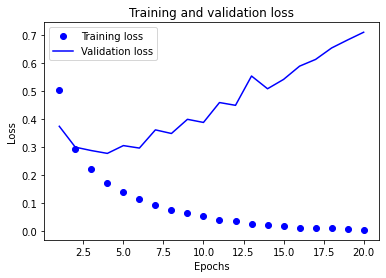

In [18]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss") 
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

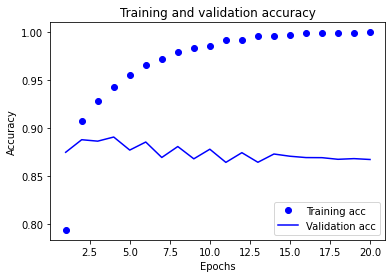

In [19]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [20]:
model = keras.Sequential([
 layers.Dense(16, activation="relu"),
 layers.Dense(16, activation="relu"),
 layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.4507 - accuracy: 0.8230
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2562 - accuracy: 0.9112
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.1977 - accuracy: 0.9302
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2935 - accuracy: 0.8839


In [21]:
results

[0.2934849262237549, 0.8838800191879272]